# Analysis of Movie Data 1989 - 2014

Final 320 Project
Group Members: Mark Bruner, Shane Fisher, Connor Denicola

## INTRODUCTION

This tutorial aims to provide an introduction to data science by analyzing Movie data over the years 1989 - 2019. The data we will be using is from https://data.world website. To view this dataset in excel use this link https://drive.google.com/file/d/1ITAlhCjppLcpPo7jQzjEz2R1JzyddjCb/view?usp=sharing . This dataset includes 615 movies from 1989 to 2019, which includes Movie Title, MPAA Rating, Budget, Gross Revenue, Release Date, Genre, Runtime, Rating, Rating Count, and Summary of movies. We will be using data from 1989 to 2014 in order to evaluate a relationship between movie rating and other movie specifications such as budget, runtime, etc. This will allow us to accurately predict how good a movie is going to be without watching it. In this tutorial we will be using python, specifically the pandas library, numpy, matplotlib.pyplot, and SciKit-Learn to collect, clean, organize, process, visualize, and analyze the data.

#### MORE ON THE TECHNOLOGY USED

Provided below are links to some of the libraries and technologies we used in this tutorial.  Click on one of the 5 resources to learn a little bit about them!

1. [pandas](https://pandas.pydata.org/docs/getting_started/overview.html)
2. [matplotlib.pyplot](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html)
3. [SciKit-Learn](https://scikit-learn.org/stable/getting_started.html)
4. [numpy](https://numpy.org/doc/stable/user/quickstart.html)
5. [python](https://www.python.org/about/gettingstarted/)

## DATA COLLECTION

To start off this tutorial we first need to collect the data and store it as a pandas dataframe. The dataset we are using is stored in Excel tables so we are going to read the Excel file using pandas function read_excel(). After doing this we have all the data stored in a pandas dataframe which makes it easy to clean and organize the raw data. Below is our code used to accomplish this along with the dataframe containing the data.

In [1]:
#import pandas library 
import pandas as pd

#read in the Excel file and store as pandas Dataframe
df = pd.read_excel('https://query.data.world/s/sqbj5q3qxof63cg5eehdtqyxjujorf')

#print the first 15 rows of Dataframe to get an idea of 
#what the Dataframe looks like
print("PANDAS DATAFRAME OF RAW DATA")
df

PANDAS DATAFRAME OF RAW DATA


,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,1,Look Who's Talking,PG-13,7500000.0,2.960000e+08,1989-10-12,Romance,93.0,5.9,73638.0,"After a single, career-minded woman is left on..."
1,2,Driving Miss Daisy,PG,7500000.0,1.457933e+08,1989-12-13,Comedy,99.0,7.4,91075.0,An old Jewish woman and her African-American c...
2,3,Turner & Hooch,PG,13000000.0,7.107992e+07,1989-07-28,Crime,100.0,7.2,91415.0,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,4,Born on the Fourth of July,R,14000000.0,1.610017e+08,1989-12-20,War,145.0,7.2,91415.0,The biography of Ron Kovic. Paralyzed in the V...
4,5,Field of Dreams,PG,15000000.0,8.443162e+07,1989-04-21,Drama,107.0,7.5,101702.0,"An Iowa corn farmer, hearing voices, interpret..."
...,...,...,...,...,...,...,...,...,...,...,...
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN,NaN


## DATA PROCESSING

After collecting all the raw data, we need to clean it up because right now it is a little messy. We are going to organize the data so that it only contains columns and rows that we want to look at and so that it is easier to read/visualize. To do this we are going to execute four data processing steps. First step is to drop any rows with missing data. The second step is to get rid of the summary column. The third step is to create a "Profit" column based on the movie's budget and gross revenue. The fourth step is to adjust the budget, gross, and revenue columns for inflation.

#### DROP ROWS WITH MISSING DATA

The purpose of this is so we are not dealing with rows that have missing information in certain columns. We only want to look at the rows that have the complete data we need.

In [2]:
# Dropping all rows that have missing data
df.dropna(inplace = True)

#### DROP THE "SUMMARY" COLUMN

The purpose of this is because we are not going to use the summary data so we are going to get rid of it so the Dataframe is cleaner

In [3]:
#Drop the Summary column 
newColumns = ['MovieID', 'Title', 'MPAA Rating', 'Budget', 'Gross', 'Release Date', 'Genre',\
                                                          'Runtime', 'Rating', 'Rating Count']

#### CREATE A "PROFIT" COLUMN

The purpose of this is because we want to know how much money a movie had made. So we are going to take the "Gross" column and subtract the "Budget" column in order to create a column that shows how much money a movie made.

In [4]:
#Subtract the Budget from the Gross to get profit
profit = (df['Gross'] - df['Budget'])

#Create column "Profit" in Dataframe
df['Profit'] = profit

#Now put the new "Profit" column after the "Gross" column for organization purposes
newColumns = ['MovieID', 'Title', 'MPAA Rating', 'Budget', 'Gross', 'Profit', 'Release Date',\
                                                  'Genre', 'Runtime', 'Rating', 'Rating Count']

#Adjust our Dataframe to include our new changes
df = df.reindex(columns = newColumns)

#### ADJUST MONEY COLUMNS FOR INFLATION

The purpose of this is so that we can compare all the monetary values on the same scale. This dataset includes movies from 1989 so we need to make sure all the monetary values are adjusted for inflation. We are going to go through the monetary values of each year and adjust them for inflation based on the year 2014.

In [5]:
#Change the "Release Date" column to only be the year value
#and rename it to "ReleaseYear"
years = df['Release Date'].astype(str).str[0:4]
df['Release Date'] = years
df = df.rename(columns = {'Release Date': 'ReleaseYear'})

#Here we are going to multiply the Budget, Gross, and Profit columns from each year
#by the inflation rate from that year to 2014 so all years are on the same scale.
counter = 0
for row in df.itertuples():
    date = row.ReleaseYear
    if date == "1989":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.91
        df.iat[counter, 4] = df.iat[counter, 4] * 1.91
        df.iat[counter, 5] = df.iat[counter, 5] * 1.91
    if date == "1990":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.81
        df.iat[counter, 4] = df.iat[counter, 4] * 1.81
        df.iat[counter, 5] = df.iat[counter, 5] * 1.81
    if date == "1991":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.74
        df.iat[counter, 4] = df.iat[counter, 4] * 1.74
        df.iat[counter, 5] = df.iat[counter, 5] * 1.74
    if date == "1992":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.69
        df.iat[counter, 4] = df.iat[counter, 4] * 1.69
        df.iat[counter, 5] = df.iat[counter, 5] * 1.69
    if date == "1993":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.64
        df.iat[counter, 4] = df.iat[counter, 4] * 1.64
        df.iat[counter, 5] = df.iat[counter, 5] * 1.64
    if date == "1994":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.60
        df.iat[counter, 4] = df.iat[counter, 4] * 1.60
        df.iat[counter, 5] = df.iat[counter, 5] * 1.60
    if date == "1995":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.55
        df.iat[counter, 4] = df.iat[counter, 4] * 1.55
        df.iat[counter, 5] = df.iat[counter, 5] * 1.55
    if date == "1996":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.51
        df.iat[counter, 4] = df.iat[counter, 4] * 1.51
        df.iat[counter, 5] = df.iat[counter, 5] * 1.51
    if date == "1997":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.47
        df.iat[counter, 4] = df.iat[counter, 4] * 1.47
        df.iat[counter, 5] = df.iat[counter, 5] * 1.47
    if date == "1998":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.45
        df.iat[counter, 4] = df.iat[counter, 4] * 1.45
        df.iat[counter, 5] = df.iat[counter, 5] * 1.45
    if date == "1999":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.42
        df.iat[counter, 4] = df.iat[counter, 4] * 1.42
        df.iat[counter, 5] = df.iat[counter, 5] * 1.42
    if date == "2000":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.37
        df.iat[counter, 4] = df.iat[counter, 4] * 1.37
        df.iat[counter, 5] = df.iat[counter, 5] * 1.37
    if date == "2001":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.34
        df.iat[counter, 4] = df.iat[counter, 4] * 1.34
        df.iat[counter, 5] = df.iat[counter, 5] * 1.34
    if date == "2002":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.32
        df.iat[counter, 4] = df.iat[counter, 4] * 1.32
        df.iat[counter, 5] = df.iat[counter, 5] * 1.32
    if date == "2003":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.29
        df.iat[counter, 4] = df.iat[counter, 4] * 1.29
        df.iat[counter, 5] = df.iat[counter, 5] * 1.29
    if date == "2004":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.25
        df.iat[counter, 4] = df.iat[counter, 4] * 1.25
        df.iat[counter, 5] = df.iat[counter, 5] * 1.25
    if date == "2005":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.21
        df.iat[counter, 4] = df.iat[counter, 4] * 1.21
        df.iat[counter, 5] = df.iat[counter, 5] * 1.21
    if date == "2006":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.17
        df.iat[counter, 4] = df.iat[counter, 4] * 1.17
        df.iat[counter, 5] = df.iat[counter, 5] * 1.17
    if date == "2007":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.14
        df.iat[counter, 4] = df.iat[counter, 4] * 1.14
        df.iat[counter, 5] = df.iat[counter, 5] * 1.14
    if date == "2008":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.10
        df.iat[counter, 4] = df.iat[counter, 4] * 1.10
        df.iat[counter, 5] = df.iat[counter, 5] * 1.10
    if date == "2009":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.10
        df.iat[counter, 4] = df.iat[counter, 4] * 1.10
        df.iat[counter, 5] = df.iat[counter, 5] * 1.10
    if date == "2010":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.09
        df.iat[counter, 4] = df.iat[counter, 4] * 1.09
        df.iat[counter, 5] = df.iat[counter, 5] * 1.09
    if date == "2011":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.05
        df.iat[counter, 4] = df.iat[counter, 4] * 1.05
        df.iat[counter, 5] = df.iat[counter, 5] * 1.05
    if date == "2012":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.03
        df.iat[counter, 4] = df.iat[counter, 4] * 1.03
        df.iat[counter, 5] = df.iat[counter, 5] * 1.03
    if date == "2013":
        df.iat[counter, 3] = df.iat[counter, 3] * 1.02
        df.iat[counter, 4] = df.iat[counter, 4] * 1.02
        df.iat[counter, 5] = df.iat[counter, 5] * 1.02
    counter = counter + 1

Now that we are all done with our Data Processing we can take a look at the finished product. Here is the new updated Dataframe that has no rows with missing values, no "Summary" column, a "Profit" column, and updated values for Budget, Gross, and Profit based on inflation for the value of the dollar in 2014.

In [6]:
#Initialize new cleaned_df from our df and print it
cleaned_df = df
print("CLEANED UP DATAFRAME")
cleaned_df

CLEANED UP DATAFRAME


,MovieID,Title,MPAA Rating,Budget,Gross,Profit,ReleaseYear,Genre,Runtime,Rating,Rating Count
0,1,Look Who's Talking,PG-13,14325000.0,5.653600e+08,5.510350e+08,1989,Romance,93.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,14325000.0,2.784652e+08,2.641402e+08,1989,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,24830000.0,1.357626e+08,1.109326e+08,1989,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,26740000.0,3.075132e+08,2.807732e+08,1989,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,28650000.0,1.612644e+08,1.326144e+08,1989,Drama,107.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...,...
505,506,Big Hero 6,PG,165000000.0,6.521054e+08,4.871054e+08,2014,Animation,102.0,7.8,380953.0
506,507,Interstellar,PG-13,165000000.0,6.751200e+08,5.101200e+08,2014,Science Fiction,169.0,8.6,1343549.0
507,508,Captain America: The Winter Soldier,PG-13,170000000.0,7.147666e+08,5.447666e+08,2014,Action,136.0,7.7,685903.0
508,509,Dawn of the Planet of the Apes,PG-13,170000000.0,7.106446e+08,5.406446e+08,2014,Science Fiction,130.0,7.6,395425.0


## EXPLORATORY ANALYSIS & DATA VISUALIZATION

Now that our data is both tidy and clean, it is time to start visualizing and further analysing our data to find trends and relationships. Throughout this section of the tutorial we will be utilizing matplotlib’s pyplot library in order to plot some of the data. We will use this to get a better picture of how a movie’s rating relates to other attributes provided by our dataset, and to start formulating conclusions. 

#### FIRST WE ARE GOING TO PLOT BUDGET VS. RATING, GROSS VS. RATING, AND PROFIT VS. RATING

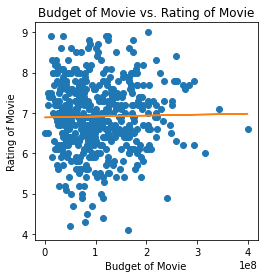

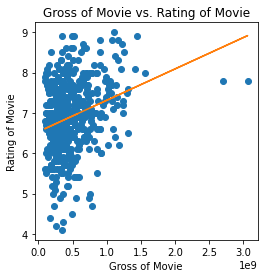

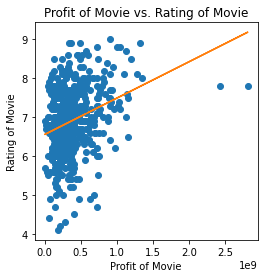

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#FOR BUDGET VS. RATING
#get values of Budget and Rating
xvalue = cleaned_df['Budget'].values
yvalue = cleaned_df['Rating'].values

#plot Budget vs. Rating with a line of best fit using numpy
plt.figure(figsize=(4,4))
plt.plot(xvalue, yvalue, 'o')
m, b = np.polyfit(xvalue, yvalue, 1)
plt.plot(xvalue, m*xvalue + b)
plt.xlabel("Budget of Movie")
plt.ylabel("Rating of Movie")
plt.title("Budget of Movie vs. Rating of Movie")
plt.show()
###############################################################

#FOR GROSS VS. RATING
#get values of Gross and Rating
xvalue = cleaned_df['Gross'].values
yvalue = cleaned_df['Rating'].values

#plot Gross vs. Rating with a line of best fit using numpy
plt.figure(figsize=(4,4))
plt.plot(xvalue, yvalue, 'o')
m, b = np.polyfit(xvalue, yvalue, 1)
plt.plot(xvalue, m*xvalue + b)
plt.xlabel("Gross of Movie")
plt.ylabel("Rating of Movie")
plt.title("Gross of Movie vs. Rating of Movie")
plt.show()
###############################################################

#FOR PROFIT VS. RATING
#get values of Profit and Rating
xvalue = cleaned_df['Profit'].values
yvalue = cleaned_df['Rating'].values

#plot Profit vs. Rating with a line of best fit using numpy
plt.figure(figsize=(4,4))
plt.plot(xvalue, yvalue, 'o')
m, b = np.polyfit(xvalue, yvalue, 1)
plt.plot(xvalue, m*xvalue + b)
plt.xlabel("Profit of Movie")
plt.ylabel("Rating of Movie")
plt.title("Profit of Movie vs. Rating of Movie")
plt.show()

From these graphs above we are able to recognize some relationships. From the first plot we are able to see that the budget for a movie does not affect the rating the movie receives. However, from the other two plots, we can clearly tell that the higher the gross revenue and profit a movie makes, the higher the movie rating is.

#### NOW WE ARE GOING TO PLOT MOVIE RUNTIME VS. MOVIE RATING

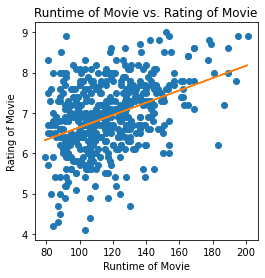

In [8]:
#FOR RUNTIME VS. RATING
#get values of Runtime and Rating
xvalue = cleaned_df['Runtime'].values
yvalue = cleaned_df['Rating'].values

#plot Runtime vs. Rating with a line of best fit using numpy
plt.figure(figsize=(4,4))
plt.plot(xvalue, yvalue, 'o')
m, b = np.polyfit(xvalue, yvalue, 1)
plt.plot(xvalue, m*xvalue + b)
plt.xlabel("Runtime of Movie")
plt.ylabel("Rating of Movie")
plt.title("Runtime of Movie vs. Rating of Movie")
plt.show()

From this plot we are able to generalize a relationship between movie runtime and movie rating. The plot clearly shows a linear relationship between the two meaning the longer the movie runtime, the higher the rating a movie will receive.

#### NOW WE ARE GOING TO PLOT RATING COUNT VS. RATING

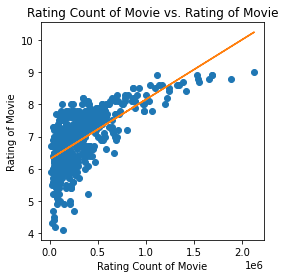

In [9]:
#FOR RATING COUNT VS. RATING
#get values of Rating Count and Rating
xvalue = cleaned_df['Rating Count'].values
yvalue = cleaned_df['Rating'].values

#plot Rating Count vs. Rating with a line of best fit using numpy
plt.figure(figsize=(4,4))
plt.plot(xvalue, yvalue, 'o')
m, b = np.polyfit(xvalue, yvalue, 1)
plt.plot(xvalue, m*xvalue + b)
plt.xlabel("Rating Count of Movie")
plt.ylabel("Rating of Movie")
plt.title("Rating Count of Movie vs. Rating of Movie")
plt.show()

From this plot we are able to see a clear relationship between Rating Count and Rating. As we can see there is a linear relationship between the two which means the higher the Rating Count, the higher the Rating of a movie.

#### NOW WE ARE GOING TO PLOT MOVIE GENRE VS. AVERAGE RATING FOR EACH GENRE

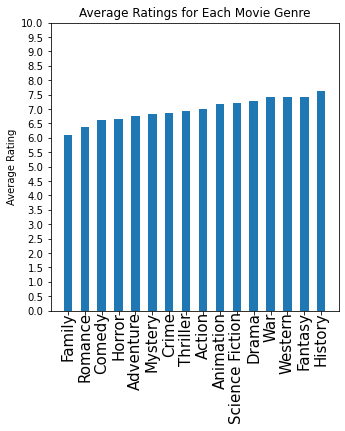

In [10]:
#FOR MOVIE GENRE VS. AVERAGE RATING FOR EACH GENRE

#group the data based on different genres
genre_groups = cleaned_df.groupby(['Genre'])
genres = {}
genre_means = []
#loop through each genre and get the average rating of that genre
#and store the genre : rating key/pair values
for g in genre_groups.groups: 
    genres[g] = genre_groups.get_group(g)['Rating'].mean()
    genre_means.append(genre_groups.get_group(g)['Rating'].mean())

#sort the genre rating means
genre_means.sort()

#sort the dictionary keys from lowest to highest ratings
sorted_keys = sorted(genres, key=genres.get)

#plot the data and add code to make plot look good
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_keys, genre_means, width = .5)
l = [i for i in np.arange(0,10.5,0.5)]
ax.set_yticks(l)
ax.set_xticklabels(rotation = (90), fontsize = 15, va='center_baseline', ha='center', labels= sorted_keys)
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Movie Genre")
plt.show()

From this plot we are able to tell which genres of movies bring in the highest/lowest ratings. We can clearly tell that Romance and Family have the lowest average ratings. Genres such as History, Fantasy, War, and Western have the highest average ratings.

#### MORE ON GENRES: WE ARE GOING TO PLOT MEAN PROFIT FOR EACH GENRE

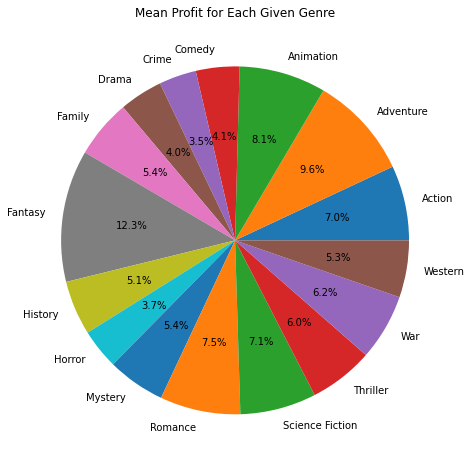

In [11]:
#FOR PIE CHART OF MEAN PROFIT FOR EACH GENRE

#Group data by each genre and get the mean profit for each genre
genre_groups2 = cleaned_df.groupby(['Genre'])
genres2 = []
genre_means2 = []
for g in genre_groups2.groups:
    genres2.append(g)
    genre_means2.append(genre_groups2.get_group(g)['Profit'].mean())
 
my_labels = 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family',\
                    'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'Science Fiction',\
                    'Thriller', 'War', 'Western'
#plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(genre_means2,labels=my_labels,autopct='%1.1f%%')
plt.title('Mean Profit for Each Given Genre')
plt.show()

For this part of the “Data Visualization” section our group looked at the mean profit for each genre. We used a pie chart to get a better idea of which specific genres are typically the most successful in terms of profit. As we can see, the spread is pretty even however we can still pick out the genres with the highest/lowest average profit. Fantasy, Adventure, and Animation are the genres with the highest average profit. Crime, Horror, Drama, and Comedy are the genres with the lowest average profit. From this pie chart and the plot above this (Movie Genre vs. Average Rating for Each Genre) we are able to conclude that Fantasy brings in great profits and great ratings. 

#### NOW WE ARE GOING TO PLOT MPAA RATINGS VS. MOVIE RATINGS

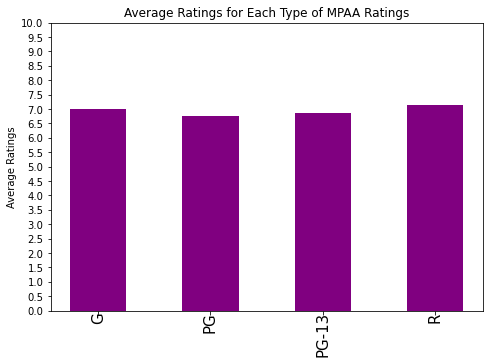

In [12]:
#FOR MPAA RATINGS VS. MOVIE RATINGS

#group data by types of MPAA Ratings and get the mean rating for each
#MPAA Rating type
rating_groups = cleaned_df.groupby(['MPAA Rating'])
m_ratings = []
m_rating_means = []
for g in rating_groups.groups: 
    m_ratings.append(g)
    m_rating_means.append(rating_groups.get_group(g)['Rating'].mean())

#plot the bar graph and add code to make plot look good
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(m_ratings, m_rating_means, width = .5, color = 'purple')
l = [i for i in np.arange(0,10.5,0.5)]
ax.set_yticks(l)
ax.set_xticklabels(rotation = (90), fontsize = 15, va='center_baseline', ha='center', labels= m_ratings)
plt.ylabel("Average Ratings")
plt.title("Average Ratings for Each Type of MPAA Ratings")
plt.show()

Based on this bar graph of Average Ratings for Each Type of MPAA Ratings we are able to visualize which MPAA Ratings have the best movie ratings. As we can clearly see from the graph, the MPAA Rating of a movie does not affect the ratings of the movies. 

#### CONCLUSION OF PLOT RELATIONSHIPS AND ATTRIBUTES

After analyzing and evaluating our plots we were able to identify many key relationships within the data. Here is a list of relationships we were able to acquire:
 - The Budget of a movie does not affect the Rating of a movie
 - The Gross Revenue of a movie has a linear relationship with the Rating of a movie
 - The Profit of a movie has a linear relationship with the Rating of a movie
 - The Runtime of a movie has a linear relationship with the Rating of a movie
 - The Rating Count of a movie has a linear relationship with the Rating of a movie
 - The Average Ratings for Genre Types shows that certain genres average higher ratings:
     - History
     - Fantasy
     - Western
     - War
 - The Average Ratings for Genre Types shows that certain genres average lower ratings:
     - Family
     - Romance
     - Comedy
     - Horror
 - The Mean Profit for Genre Types shows that certain genres average higher profits:
     - Fantasy
     - Adventure
     - Animation
 - The Mean Profit for Genre Types shows that certain genres average lower profits:
     - Crime
     - Horror
     - Drama
     - Comedy
 - The MPAA Ratings of a movie does not affect the Rating of a movie
     

## MODEL CREATION AND ANALYSIS

Now that we have all our data together and we have identified the trends/relationships within our dataset, we can start creating our models. Our goal of the models is to be able to predict the rating of a movie based on attributes of a movie. 

#### THE MODELS WE WILL BE USING 

We are going to be using three types of classification algorithms: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Decision Tree](https://scikit-learn.org/stable/modules/tree.html), and [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).

Click on each any of the three model links above to learn a little bit about what they are.

#### SETTING UP OUR PREDICTORS & TARGET

Our goal is to be able to accurately predict the rating of a movie based on the movies attributes. We plotted and identified relationships between certain attributes and the ratings of movies. We are going to use the attributes that had a distiguishable relationship when compared to Rating. These predictors would be Gross, Profit, Genre, Runtime, and Rating Count. With these atrributes of a movie we are going to predict the rating of a movie. Now to make our models be able to predict accurately, we are going to turn the Ratings into two parts so that we are able to use binary classifying. To do this, we are going to seperate the ratings into movies with rating 6.0 and lower, and, on the contrary, movies with rating 7.0 or higher. To do this we are going to round the current ratings of the movies to the nearest whole integer, and then seperate into two groups of ratings. In the code below, we show exactly how we set up our predictors and our targets. 

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

target = []
genre = []

#round the rating column to nearest whole integer
cleaned_df['Rating'] = cleaned_df['Rating'].round()

#loop through the Dataframe
for row in cleaned_df.itertuples():
    
    #get current row rating and genre
    rate = row.Rating
    g = row.Genre
    
    #if the current rating is 6 or lower than associate
    #that movie with target group 1.0
    if rate <= 6.0:
        target.append(1.0)
        
    #if the current rating is 7 or higher than associate
    #that movie with target group 2.0
    elif rate > 6.0:
        target.append(2.0)
        
    #For each genre type, we are going to convert them into
    #groups similar to the rating groups
    #For example Action is group 1.0
    if g == 'Action':
        genre.append(1.0)
    if g == 'Adventure':
        genre.append(2.0)
    if g == 'Animation':
        genre.append(3.0)
    if g == 'Comedy':
        genre.append(4.0)
    if g == 'Crime':
        genre.append(5.0)
    if g == 'Drama':
        genre.append(6.0)
    if g == 'Family':
        genre.append(7.0)
    if g == 'Fantasy':
        genre.append(8.0)
    if g == 'History':
        genre.append(9.0)
    if g == 'Horror':
        genre.append(10.0)
    if g == 'Mystery':
        genre.append(11.0)
    if g == 'Romance':
        genre.append(12.0)
    if g == 'Science Fiction':
        genre.append(13.0)
    if g == 'Thriller':
        genre.append(14.0)
    if g == 'War':
        genre.append(15.0)
    if g == 'Western':
        genre.append(16.0)
        
#Now we are going to create new columns for Genre and Rating
#This way we can use this columns to help predict our targets
cleaned_df['GenreScore'] = genre
cleaned_df['Target'] = target

#Our attributes that we are going to be using to predict
movie_attr = ["Gross", "Profit", "Runtime", "GenreScore", "Rating Count"]

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(cleaned_df[movie_attr], cleaned_df['Target'],\
                                                    test_size=0.4, random_state=42)

#The training data will be used with our classifier algorithms to 
#predict our targets based on our testing data

#### LOGISTIC REGRESSION

Logistic Regression is a classification algorithm that predicts the probability of occurrence of an event by fitting data to a logit function. In our case it will be predicting either group 1.0 which is movie has rating 6.0 or less, or group 2.0 which is movie has rating 7.0 or higher.

In [14]:
from sklearn.linear_model import LogisticRegression

#Use Logistic Regression to predict our target rating groups
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#print the accuracy of correct predictions
print("Logistic Regression Accuracy: ", log_reg.score(X_test, y_test))

Logistic Regression Accuracy:  0.7738693467336684


#### DECISION TREE

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). The class it will be predicting is either group 1.0 which is movie has rating 6.0 or less, or group 2.0 which is movie has rating 7.0 or higher.

In [15]:
from sklearn import tree

#Use Decision Tree to predict our target rating groups
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

#print the accuracy of correct predictions
print("Decision Tree Accuracy: ", tree.score(X_test, y_test))

Decision Tree Accuracy:  0.6381909547738693


#### LINEAR DISCRIMINANT ANALYSIS

A method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification. The class it will be predicting is either group 1.0 which is movie has rating 6.0 or less, or group 2.0 which is movie has rating 7.0 or higher.

In [16]:
from sklearn import discriminant_analysis

#Use Linear Discriminant Analysis to predict our target rating groups
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#print the accuracy of correct predictions
print("Linear Discriminant Analysis: ", lda.score(X_test, y_test))

Linear Discriminant Analysis:  0.7185929648241206


## RESULTS

After testing various important attributes from the dataset of movies, we found that the Logistic Regression gave us the highest percentage of accuracy at .77.  This model allows us to pretty accurately predict the rating of a given movie, either higher or lower than a 6.0 rating, based on profit, rating count, gross, runtime, and genre score.

## CONCLUSION

After collecting the data and cleaning it to fit how we wanted, we were able to visualize it and begin to figure out what the most significant attributes of a movie were in terms of determining rating. From here we used our specific data attributes to build a logistic regression, decision tree, and linear discriminant model in order to predict the rating group a movie falls into. The logistic regression model gave us an accuracy of .77, which is pretty good when considering how many factors play into determining a movie's final rating.

If directors and people behind the scenes of the movie were able to better predict how movie ratings would be based on just a few factors in the grand scheme of things, not only do movies have the potential of being a lot better, but there is also the opportunity to grow the billion dollar industry of movies into something even greater.

We hope this tutorial got you interested in investigating your own interests in data science like we did with movies.
